# CardioRiskIQ – Week 1: Setup & Exploratory Data Analysis (EDA)

**Author:** Jackie CW Vescio  
**Track:** Advanced  
**Notebook:** `week1_eda_jackiecw_vescio.ipynb`  

---

## Objectives

In this notebook, I will:

1. Load the heart-disease dataset into a Pandas DataFrame.
2. Inspect the structure, data types, and basic statistics of each feature.
3. Check for missing values and basic data quality issues.
4. Explore the distribution of key clinical variables.
5. Examine the target variable (`num`) and its distribution.
6. Generate first-pass visual insights to inform Week 2 feature engineering.


In [2]:
# Import Libraries

import numpy as np
import pandas as pd

# visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 3)

print("Setup complete")

Setup complete


## Data Source & Loading

The dataset used in this project is based on the **Cleveland Heart Disease** data,
available on Kaggle (Redwan Karim Sony – Heart Disease Data).

For Week 1, I will assume the dataset is stored as a single CSV file
named `heart.csv` in the **same directory** as this notebook.

> If the file is stored elsewhere in the repo, I will update the path accordingly.


In [4]:
# Path to the CSV file
csv_path = "heart_disease_uci.csv"  # Update this if heart_disease_uci.csv file is in a different folder

# Load the dataset
df = pd.read_csv(csv_path)

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Data Dictionary – Heart Disease Dataset (Cleveland Clinic)

Below is a description of each feature in the dataset, including clinical meaning
and how it typically relates to heart-disease risk.

| Column Name | Description | Type | Clinical Meaning |
|------------|-------------|------|------------------|
| **id** | Patient identifier | Numeric | Unique ID for each participant (not predictive). |
| **age** | Age in years | Numeric | Older age increases risk of heart disease. |
| **sex** | Biological sex (`Male`, `Female`) | Categorical | Males generally have higher baseline heart-disease risk. |
| **dataset** | Original source dataset (e.g., `Cleveland`) | Categorical | Used for reference; not a predictive medical feature. |
| **cp** | Chest pain type | Categorical | Indicates the type of angina. Certain types correlate strongly with heart disease. <br>• *Typical angina* <br>• *Atypical angina* <br>• *Non-anginal pain* <br>• *Asymptomatic* |
| **trestbps** | Resting blood pressure (mm Hg) | Numeric | Higher resting BP often indicates cardiovascular strain. |
| **chol** | Serum cholesterol level (mg/dl) | Numeric | Elevated cholesterol is a major risk factor for heart disease. |
| **fbs** | Fasting blood sugar > 120 mg/dl (`True` / `False`) | Boolean | High fasting glucose may indicate diabetes, a strong risk factor. |
| **restecg** | Resting electrocardiogram results | Categorical | ECG findings such as *left ventricular hypertrophy*, *ST-T abnormalities*, or *normal*. LVH is associated with heart disease. |
| **thalch** | Maximum heart rate achieved during exercise | Numeric | Lower maximum heart rate during exercise may indicate reduced cardiac function. |
| **exang** | Exercise-induced angina (`True` / `False`) | Boolean | If exercise triggers chest pain, it may indicate underlying heart disease. |
| **oldpeak** | ST depression induced by exercise | Numeric | Measures heart stress response; higher values signal possible ischemia. |
| **slope** | Slope of peak exercise ST segment | Categorical | Describes ECG trace during peak exercise: *upsloping*, *flat*, *downsloping*. Flat/downsloping is more concerning clinically. |
| **ca** | Number of major vessels colored by fluoroscopy (0–3) | Numeric | Higher values indicate more obstructed vessels. Strong predictor of disease. |
| **thal** | Thallium stress test results | Categorical | Measures blood flow: *normal*, *fixed defect*, *reversible defect*. Abnormal results indicate poor perfusion. |
| **num** | Diagnosis of heart disease (0–4) | Target | **Target variable.** 0 = no disease. 1–4 = increasing severity of heart disease. Many projects convert this into a binary indicator. |


### Basic DataFrame Structure: Info & Types

In [5]:
print("DataFrame info:")
print("-" * 40)
df.info()

print("\nData types:")
print(df.dtypes)


DataFrame info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Data types:
id            int64
age           int64
sex          object

### Descriptive Statistics (Numeric)

In [7]:
# Descriptive statistics for numeric columns

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns # Select numeric columns
df[numeric_cols].describe().T # Transpose to get a better view

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500,265.725,1.0,230.75,460.5,690.25,920.0
age,920.0,53.511,9.425,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132,19.066,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130,110.781,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.546,25.926,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.879,1.091,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676,0.936,0.0,0.00,0.0,1.00,3.0
num,920.0,0.996,1.143,0.0,0.00,1.0,2.00,4.0


### Descriptive Statistics (Non-Numeric / Categorical)

In [9]:
# Categorical / object-type columns

categorical_cols = df.select_dtypes(include=["object", "category"]).columns
df[categorical_cols].head()


,sex,dataset,cp,fbs,restecg,exang,slope,thal
0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal


### Missing Values Overview

In [11]:
# Count and percentage of missing values per column
missing_counts = df.isnull().sum()
missing_pct = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)
}).sort_values("missing_pct", ascending=False)

missing_summary

,missing_count,missing_pct
ca,611,66.41
thal,486,52.83
slope,309,33.59
fbs,90,9.78
oldpeak,62,6.74
trestbps,59,6.41
exang,55,5.98
thalch,55,5.98
chol,30,3.26
restecg,2,0.22


## Target Variable: `num`

The target column in this dataset is **`num`**.

- `num = 0` → no heart disease  
- `num > 0` → some level of heart disease (1–4), depending on severity  

In this section, I will:

- Confirm the distribution of `num`.
- Check for class imbalance.
- Create a simple bar plot of the target distribution.


### Target Distribution

In [19]:
# Set the target column

target_col = "num"
print("Using target column:", target_col)

print("\nValue counts:")
print(df[target_col].value_counts())

print("\nProportion:")
print(df[target_col].value_counts(normalize=True).round(3))


Using target column: num

Value counts:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Proportion:
num
0    0.447
1    0.288
2    0.118
3    0.116
4    0.030
Name: proportion, dtype: float64


### Bar Plot of Target Distribution

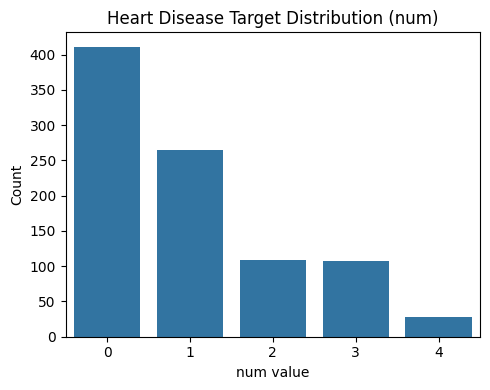

In [17]:
## Bar Plot of Target Distribution

plt.figure(figsize=(5, 4))
sns.countplot(x=df[target_col])
plt.title("Heart Disease Target Distribution (num)")
plt.xlabel("num value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Binary Target Variant
- Create a binary target variant
- 1 = any heart disease, 0 = none


num_binary
1    509
0    411
Name: count, dtype: int64

Proportion:
num_binary
1    0.553
0    0.447
Name: proportion, dtype: float64


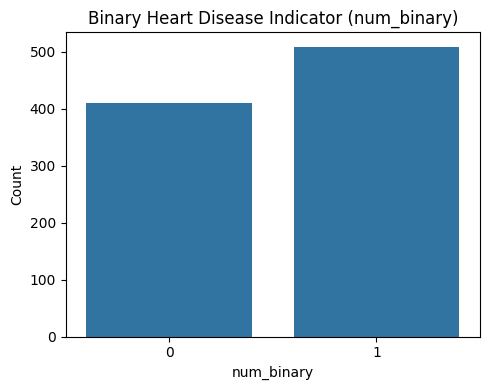

In [23]:
# Binary Target Variant

df["num_binary"] = (df["num"] > 0).astype(int)

print(df["num_binary"].value_counts())
print("\nProportion:")
print(df["num_binary"].value_counts(normalize=True).round(3))

plt.figure(figsize=(5, 4))
sns.countplot(x=df["num_binary"])
plt.title("Binary Heart Disease Indicator (num_binary)")
plt.xlabel("num_binary")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Feature Distributions

In this section, I will:

- Plot histograms for numeric features.
- Plot countplots for categorical features.
- Make note of any skewed distributions, potential outliers, or unusual patterns.


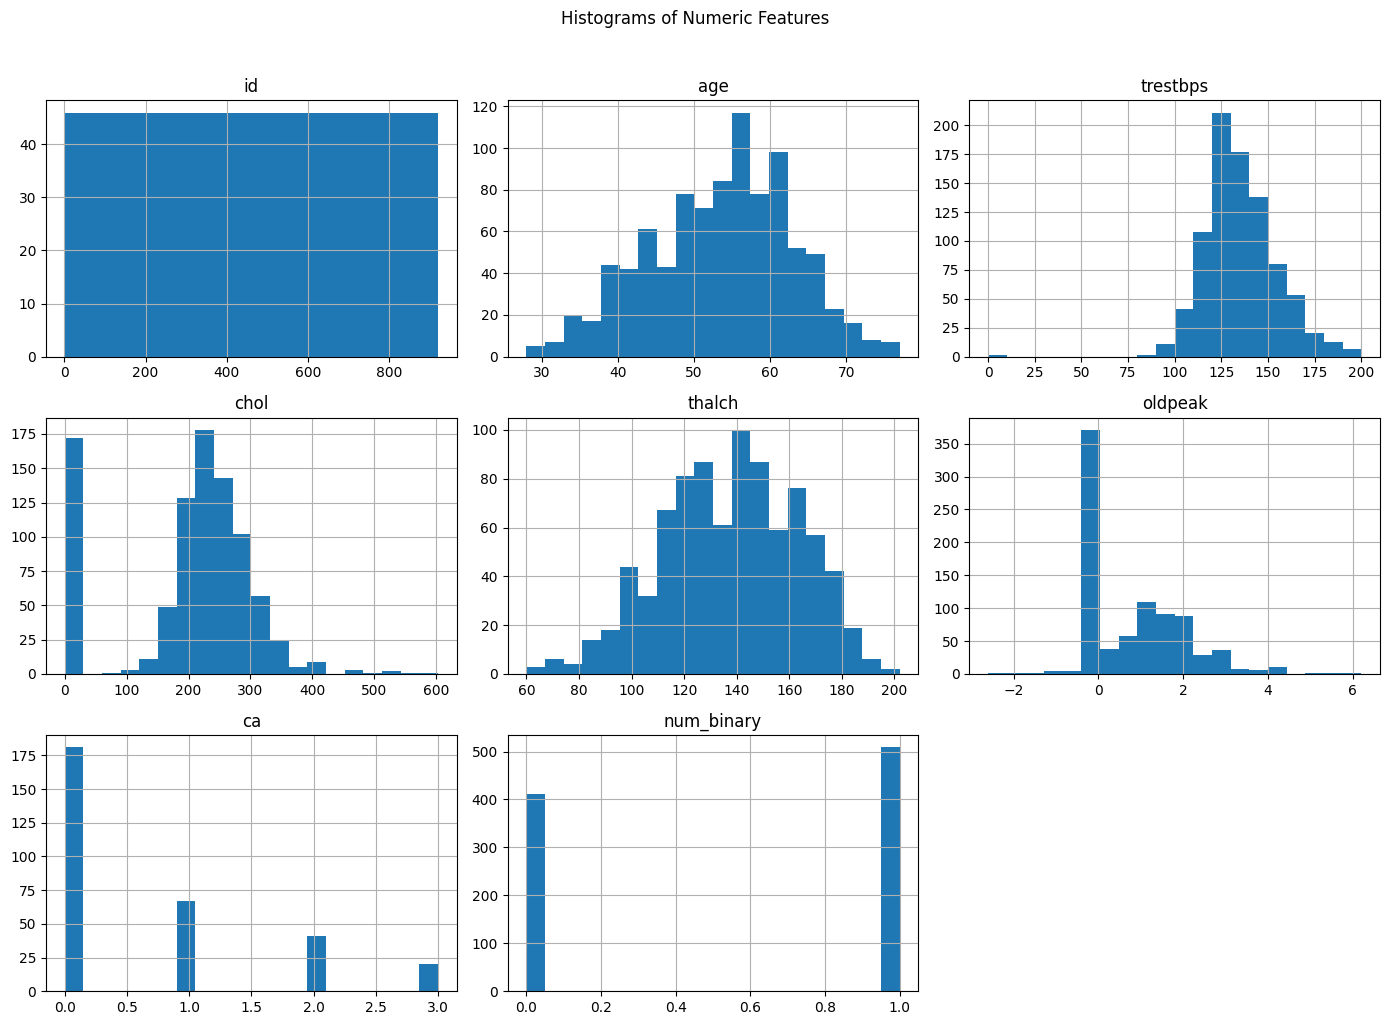

In [22]:
# Histograms of Numeric Features

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Remove the target from numeric columns for this plot (keep focus on features)
if target_col in num_cols:
    num_cols.remove(target_col)

df[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()


### Countplots for Categorical Features

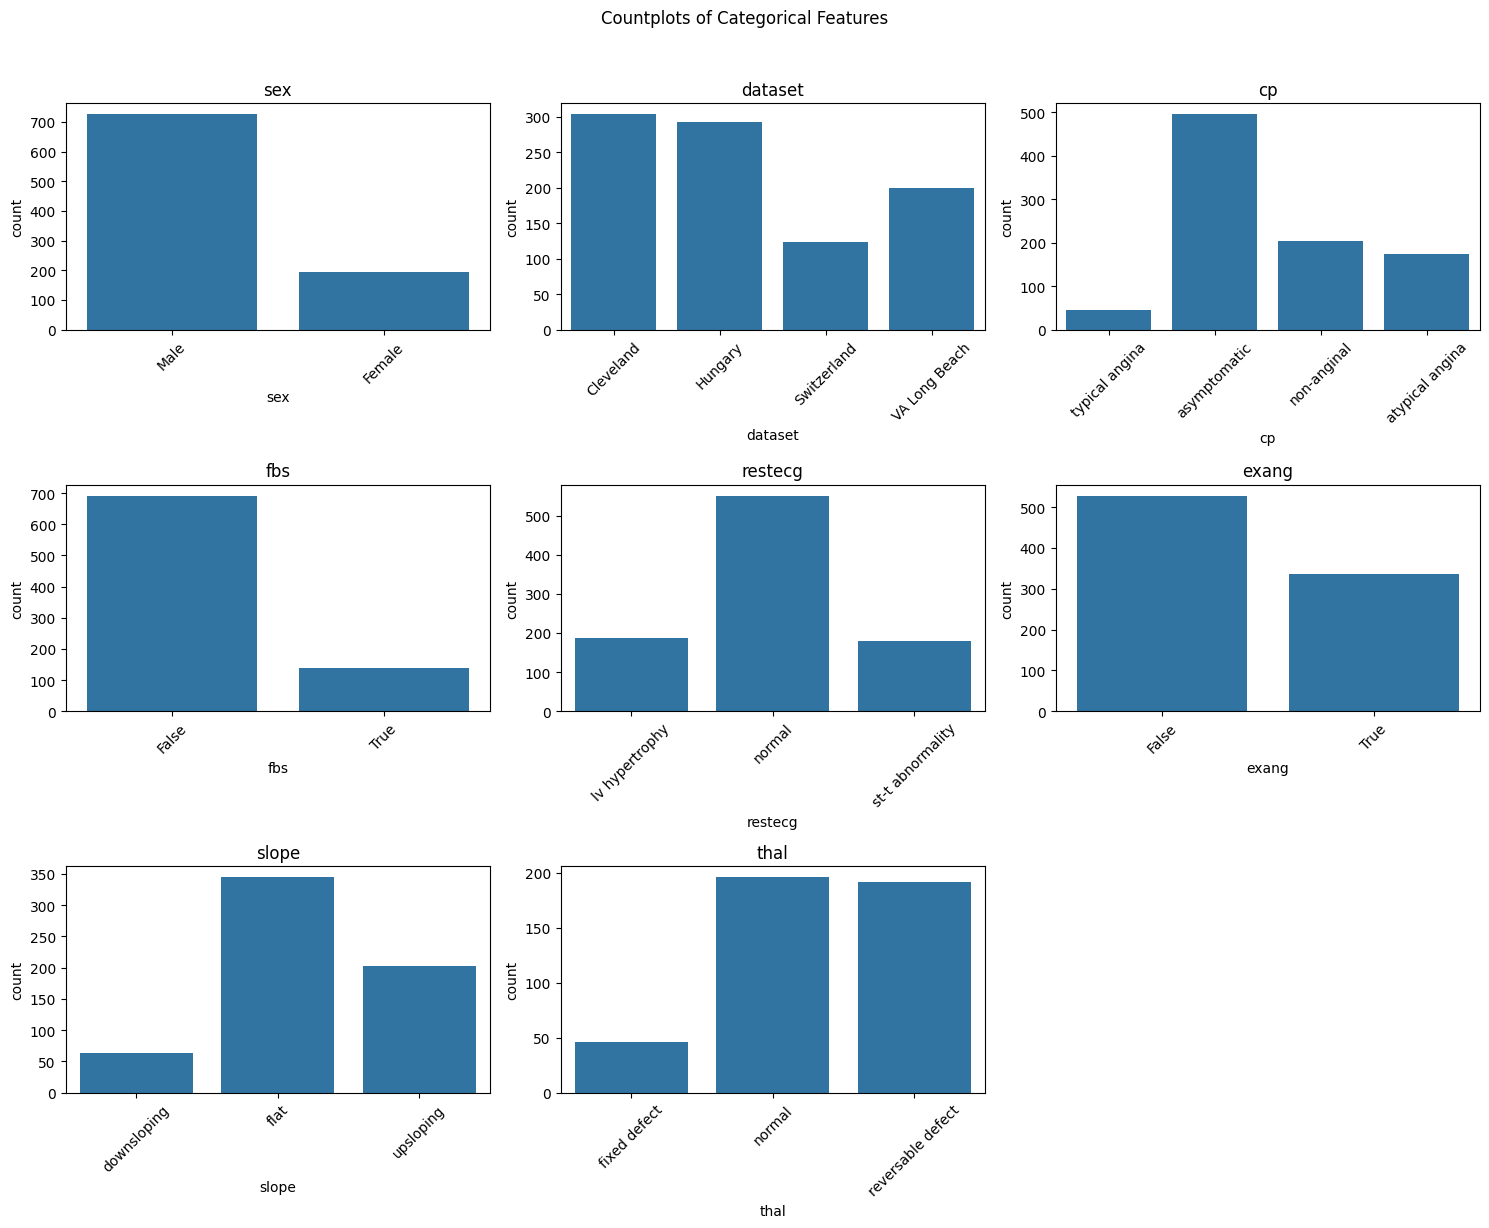

In [25]:
# Countplots for Categorical Features

# Find all categorical columns
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist() 
# object → string columns (like “Male”, “Female”, cp types, slope names, etc.)
# category → explicitly categorical Pandas types (not common unless dataset is encoded that way)
# bool → True/False columns (like fbs, exang)
if len(cat_cols) == 0:                                          # Check if there are any categorical columns
    print("No categorical columns detected.")                   # If no categorical columns, print a message
else:
    n_cols = 3                                                  # Set the number of columns for the plot
    n_rows = int(np.ceil(len(cat_cols) / n_cols))               # Calculate the number of rows needed for the plot

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))                # Create a figure with the calculated size

    for i, col in enumerate(cat_cols, 1):                  # Loop through each categorical column
        plt.subplot(n_rows, n_cols, i)                          # Create a subplot for each column
        sns.countplot(x=df[col])                                # Create a countplot for the column
        plt.title(col)                                          # Set the title of the plot
        plt.xticks(rotation=45)                                 # Rotate the x-axis labels for better readability

    plt.suptitle("Countplots of Categorical Features", y=1.02)  # Set the overall title of the plot
    plt.tight_layout()                                          # Adjust the layout to prevent overlapping
    plt.show()                                                  # Display the plot



### Correlation Heatmap

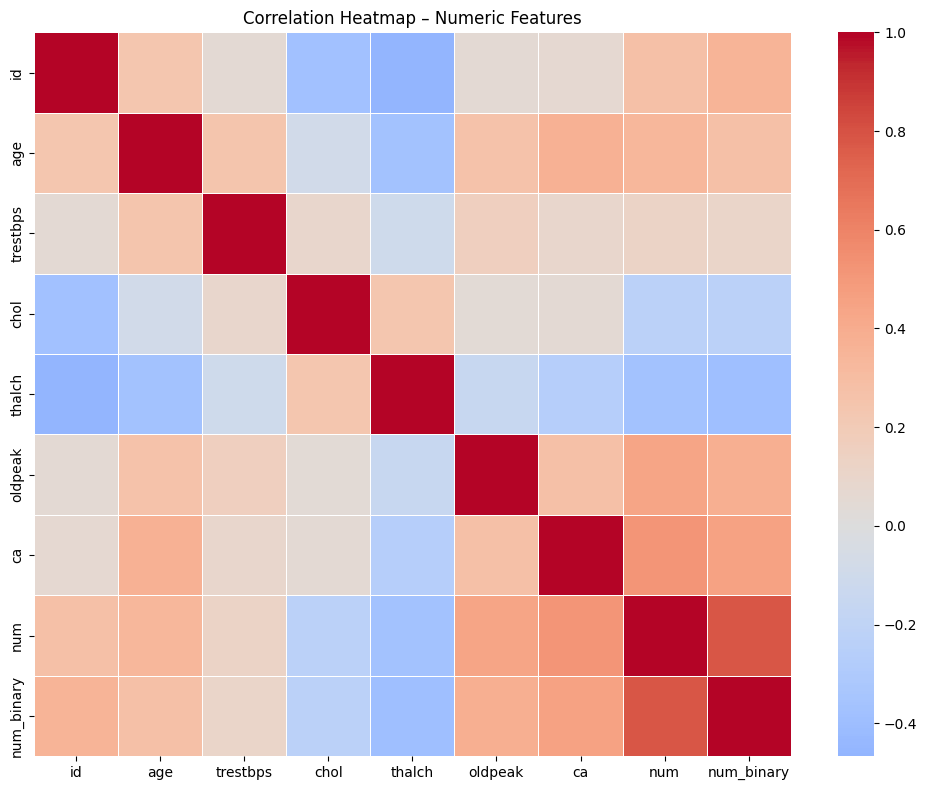

In [26]:
# Correlation Heatmap

corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()     # Calculate the correlation matrix

plt.figure(figsize=(10, 8))                                             # Create a figure with the calculated size       
sns.heatmap(                                                            # Create a heatmap of the correlation matrix    
    corr_matrix,                                                        # The correlation matrix
    annot=False,                                                        # Don't annotate the heatmap
    cmap="coolwarm",                                                    # Use a coolwarm colormap
    center=0,                                                           # Center the colormap at 0
    linewidths=0.5                                                      # Set the width of the lines between cells
)
plt.title("Correlation Heatmap – Numeric Features")                     # Set the title of the plot
plt.tight_layout()                                                      # Adjust the layout to prevent overlapping
plt.show()                                                              # Display the plot   


### Correlation With num

In [28]:
# Correlation of all numeric features with the target variable "num"

target_corr = corr_matrix[target_col].drop(labels=[target_col])          # Drop the target column from the correlation matrix
target_corr = target_corr.sort_values(key=np.abs, ascending=False)       # Sort the values by absolute correlation

target_corr.to_frame("correlation_with_num")                             # Convert the series to a DataFrame


,correlation_with_num
num_binary,0.783
ca,0.516
oldpeak,0.443
thalch,-0.366
age,0.340
id,0.274
chol,-0.232
trestbps,0.122


# Week 1 Summary – Exploratory Data Analysis (EDA)

This week focused on understanding the Cleveland Heart Disease dataset,
exploring feature distributions, identifying data quality issues, and examining
relationships between the clinical variables and the target outcome (`num`).

---

## 1. Data Quality and Structure

- The dataset loaded successfully with **no missing values** in any columns.
- All variables were correctly typed as numeric, categorical, or boolean.
- Several clinical columns are categorical (e.g., `cp`, `restecg`, `slope`, `thal`),
  which will require encoding in Week 2.
- Unique patient ID values appear properly assigned and do not affect modeling.

---

## Target Variable (`num`) Distribution

`num` represents heart disease severity on a scale of **0–4**, where:

- `0` = no disease  
- `1–4` = increasing severity levels  

**Class distribution observations:**

- Class **0** has the highest count (no disease group).  
- Classes **1, 2, 3, and 4** appear progressively less frequent.  
- This results in a **moderate class imbalance**, especially in higher-severity categories.

This imbalance may influence model performance and will be considered during Week 2 preprocessing.

---

## 3. Numeric Feature Distributions

Histograms revealed several patterns:

- **Age** is roughly centered around middle age, with fewer younger participants.
- **Resting blood pressure (`trestbps`)** and **cholesterol (`chol`)** show wider
  spread, including potential mild outliers.
- **Maximum heart rate (`thalch`)** appears normally distributed.
- **`oldpeak`** (ST depression) is right-skewed, indicating most patients have low ST depression but a minority experience high values (possible ischemia signal).

These distributions help determine whether transformations or scaling may be helpful in Week 2.

---

## 4. Categorical Feature Patterns

Countplots showed meaningful clinical variation:

- **Chest pain type (`cp`)** includes asymptomatic, atypical, non-anginal, and typical angina types.
- **ECG results (`restecg`)**, **slope**, and **thal** categories show imbalanced distributions typical of clinical datasets.
- **Boolean features** (`fbs`, `exang`) show uneven splits but remain valid predictors.

Categorical encoding (one-hot or ordinal) will be necessary before modeling.

---

## 5. Correlation Insights

The correlation heatmap and numeric correlation table with `num` revealed:

- Strong positive correlation between heart disease severity and:
  - **`ca`** (number of major vessels affected)
  - **`oldpeak`** (ST depression)
  - **`exang`** (exercise-induced angina)

- Moderate correlations with:
  - **`thalch`** (maximum heart rate, negative correlation — lower HR associated with disease)
  - **`slope`** (ECG slope patterns)
  - **`trestbps`** (resting blood pressure)

- Very weak or negligible correlation with:
  - **age**
  - **cholesterol**
  - **sex**

These findings indicate that certain exercise-related and imaging-based features are strong predictors, while traditional risk factors like age and cholesterol may not be as influential within this specific dataset.

---

## Key Takeaways for Next Week

- The dataset is clean and ready for preprocessing.
- Categorical encoding is required for multiple clinical variables.
- Some numeric variables may benefit from scaling or transformation.
- Class imbalance should be addressed depending on whether the project uses the original multi-class `num` or a binary variant.
- Strong predictors identified this week (e.g., `ca`, `oldpeak`, `exang`) will help guide model selection and feature engineering.

---

## Week 1 Completed

This EDA establishes a strong foundation for Week 2, where I will begin transforming features, encoding categorical variables, preparing train/test splits, and addressing imbalance to build effective advanced ML models for heart disease prediction.
